# Pymaceuticals Inc.

1) Above all, we can observe that the distribution of male and female in the study is almost equal, so we won't have to worry about the gender influence on our final conclusions. We can however notice that more mice have been treated with Capomulin and Ramicane, which could have a small influence on our final analysis.

2) Ramicane seems to be the most performing treatment for SCC, then Capomulin slightly behind, and Infubinol the worst, among four of the most promising treatment regimens

3) Under the Capomulin regimen, we clearly see a correlation between the tumor volume and the weight. We can suppose that being overweight is worsening the tumor and needs to be considerated.

In [42]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [43]:
# Checking the number of mice.
number_mice = complete_data["Mouse ID"].value_counts()
print(len(number_mice))


249


In [44]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_data.loc[complete_data.duplicated(subset=["Mouse ID", "Timepoint"])]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [45]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = complete_data.loc[complete_data["Mouse ID"] == "g989", :]
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_data_cleaned = complete_data[complete_data['Mouse ID'] != 'g989']
complete_data_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [47]:
# Checking the number of mice in the clean DataFrame.
complete_data_cleaned["Mouse ID"].value_counts()
number_mice_cleaned = len(complete_data_cleaned["Mouse ID"].value_counts())
print(number_mice_cleaned)

248


## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Creating multiple series using groupby on Drug Regimen
avg_tumor_regimen = complete_data_cleaned.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
med_tumor_regimen = complete_data_cleaned.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor_regimen = complete_data_cleaned.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddev_tumor_regimen = complete_data_cleaned.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
stderr_tumor_regimen = complete_data_cleaned.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Create a dataframe to hold the above results
drug_summary = pd.DataFrame({"Mean Tumor Volume": avg_tumor_regimen,
                               "Median Tumor Volume": med_tumor_regimen,
                               "Tumor Volume Variance": var_tumor_regimen,
                               "Tumor Volume Std. Dev.": stddev_tumor_regimen,
                               "Tumor Volume Std. Err.": stderr_tumor_regimen
                            })

drug_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

# Create a dataframe using the groupby function on Drug Regimen and adding the Tumor Volume calculations with the aggregate function
drug_summary_alt = complete_data_cleaned.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
drug_summary_alt



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

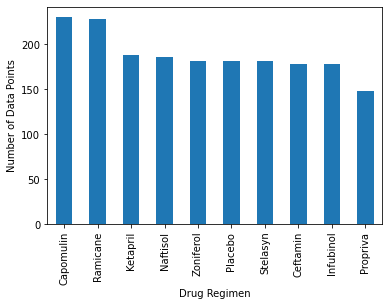

In [50]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Create a variable for Drug Regimen
drug_regimen = complete_data_cleaned["Drug Regimen"].value_counts()

# Sorting our drug regimen variable in descending order
drug_regimen = drug_regimen.sort_values(ascending=False)

# Configure and display Drug Regimen bar plot
drug_regimen_plot = drug_regimen.plot.bar(x='Drug Regimen', y='Mouse ID', rot=90)
drug_regimen_plot.set_xlabel("Drug Regimen")
drug_regimen_plot.set_ylabel("Number of Data Points")
drug_regimen_plot

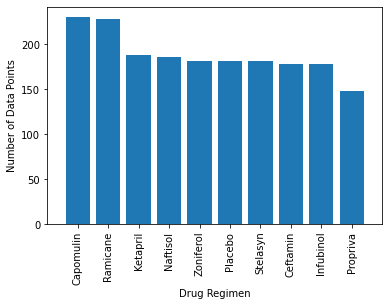

In [51]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create a bar chart based off of the variable from before
drug_regimen_chart = drug_regimen.plot.bar(width=0.8)

# Set the xlabel and ylabel using class methods
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

# Set xlim
plt.xlim(-1, len("Drug Regimen")-2)

plt.show()


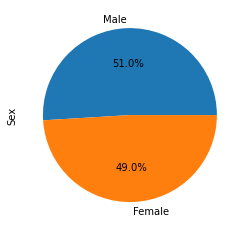

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a variable for sex distribution
sex_distribution = complete_data_cleaned['Sex'].value_counts()

# Sorting our sex distribution group variable in descending order
sex_distribution = sex_distribution.sort_values(ascending=False)

# Configure and display sex distribution pie plot
sex_distribution_plot = sex_distribution.plot(kind='pie', subplots=True, autopct='%1.1f%%')



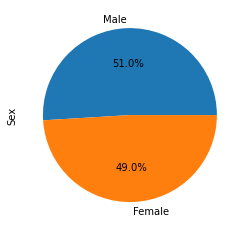

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(sex_distribution, autopct="%1.1f%%", labels=sex_distribution.index)
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = complete_data_cleaned.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_group = pd.merge(greatest_timepoint, complete_data_cleaned, how='left', on=['Mouse ID', 'Timepoint'])


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments:
    tumor_vol_regimen = merged_group.loc[merged_group['Drug Regimen'] == x]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(tumor_vol_regimen)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_vol_regimen.loc[(tumor_vol_regimen < lower_bound) | (tumor_vol_regimen > upper_bound)]
    print(f"{x}'s potential outliers: {outliers}")




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


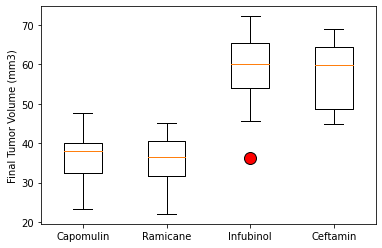

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
round_square = dict(markerfacecolor='r', marker='o', markersize=12)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, flierprops=round_square)
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

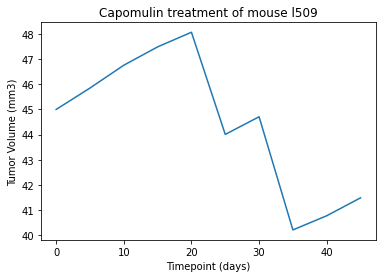

In [57]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Picking up a mouse (l509)
mouse_l509 = complete_data_cleaned.loc[(complete_data_cleaned['Drug Regimen'] == 'Capomulin') & (complete_data_cleaned['Mouse ID'] == 'l509')]

# Generate a line plot
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()


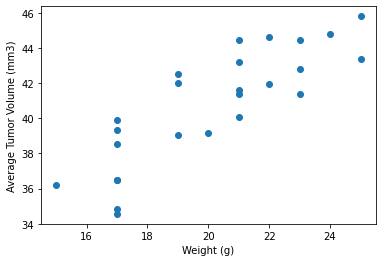

In [58]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Locate Capomulin regimen
capomulin_regimen = complete_data_cleaned.loc[complete_data_cleaned['Drug Regimen'] == 'Capomulin']

# Define a variable to group the Capomulin regimen on a mean function
average_capomulin = capomulin_regimen.groupby(['Mouse ID']).mean()

# Generate a scatter plot
x_values = average_capomulin['Weight (g)']
y_values = average_capomulin['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

The correlation between mouse weight and the average tumor volume is: 0.84


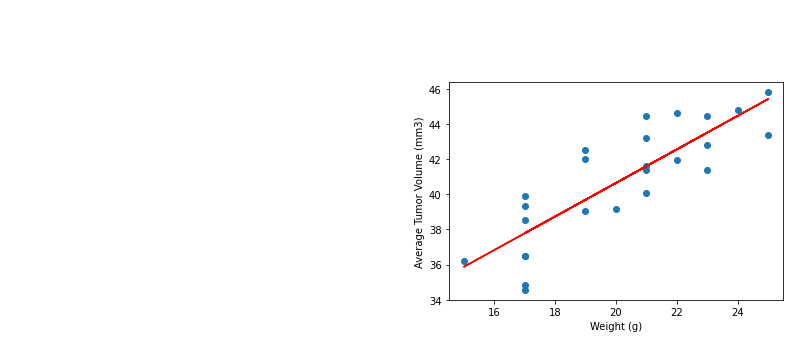

In [60]:
# Correlation
correlation = st.pearsonr(average_capomulin['Weight (g)'], average_capomulin['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0],2)}")

# Plot with linear regression model 
x_values = average_capomulin['Weight (g)']
y_values = average_capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()